#HR Analtyics Project code - INST627: Analytics for Information Professionals

by: Robin Godinho

The following code was used to derive key statistical insights on the HR dataset used in the Data Analytics final project.

In [1]:
import pandas as pd
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import random
hr = pd.read_excel('/content/HR Data.xlsx')
print(hr.shape)

(1470, 41)


In [ ]:
hr.head()

In [ ]:
print(hr.columns)

Index(['Attrition', 'Business Travel', 'CF_age band', 'CF_attrition label',
       'Department', 'Education Field', 'emp no', 'Employee Number', 'Gender',
       'Job Role', 'Marital Status', 'Over Time', 'Over18',
       'Training Times Last Year', '-2', '0', 'Age', 'CF_current Employee',
       'Daily Rate', 'Distance From Home', 'Education', 'Employee Count',
       'Environment Satisfaction', 'Hourly Rate', 'Job Involvement',
       'Job Level', 'Job Satisfaction', 'Monthly Income', 'Monthly Rate',
       'Num Companies Worked', 'Percent Salary Hike', 'Performance Rating',
       'Relationship Satisfaction', 'Standard Hours', 'Stock Option Level',
       'Total Working Years', 'Work Life Balance', 'Years At Company',
       'Years In Current Role', 'Years Since Last Promotion',
       'Years With Curr Manager'],
      dtype='object')


# Data overview




Gender Analysis

In [ ]:
Female = hr['Gender'].value_counts()['Female']
print(f'The number of female employees in the company is {Female}')

Male = hr['Gender'].value_counts()['Male']
print(f'The number of Male employees in the company is {Male}')

Total = Female + Male
Total

Female_percentage = Female/Total*100
print(f'The females in the company is {Female_percentage}%')

Male_pecentage = Male/Total*100
print(f'The males in the company is {Male_pecentage}%')

hr['Gender'].hist()


Education Anaylsis

In [ ]:
# Different levels of Education
Associates = hr['Education'].value_counts()["Associates Degree"]
print(f'The number of employees with a Associates degree is {Associates}')

Bachelors = hr['Education'].value_counts()["Bachelor's Degree"]
print(f'The number of employees with a Bachelors degree is {Bachelors}')

Masters = hr['Education'].value_counts()["Master's Degree"]
print(f'The number of employees with a Masters degree is {Masters}')

Doctoral = hr['Education'].value_counts()["Doctoral Degree"]
print(f'The number of employees with a Doctoral degree is {Doctoral}')

The number of employees with a Associates degree is 282
The number of employees with a Bachelors degree is 572
The number of employees with a Masters degree is 398
The number of employees with a Doctoral degree is 48


# Attrition Analysis

Attrition Rate by Gender

In [ ]:
attrition_yes = hr[hr['Attrition'] == 'Yes']

# Count the number of employees for each gender with Attrition 'Yes'
attrition_yes_count_by_gender = attrition_yes['Gender'].value_counts().reset_index()
attrition_yes_count_by_gender.columns = ['Gender', 'Count']

print(attrition_yes_count_by_gender)


   Gender  Count
0    Male    150
1  Female     87


Attrition rate by department

In [ ]:
attrition_yes_count_by_department = attrition_yes['Department'].value_counts().reset_index()
attrition_yes_count_by_department.columns = ['Department', 'Count']

print(attrition_yes_count_by_department)

  Department  Count
0        R&D    133
1      Sales     92
2         HR     12


Attrition by job satisfaction score

In [ ]:
attrition_yes_count_by_satisfaction = attrition_yes['Job Satisfaction'].value_counts().reset_index()
attrition_yes_count_by_satisfaction.columns = ['Job Satisfaction', 'Count']

print(attrition_yes_count_by_satisfaction)

   Job Satisfaction  Count
0                 3     73
1                 1     66
2                 4     52
3                 2     46


Income Analysis

Calculate count, mean, standard deviation, variance, IQR, median, max, min for 'Monthly Income.'





In [ ]:

print('count:', hr['Monthly Income'].count())
print('mean: ', hr['Monthly Income'].mean())
print('std:  ', hr['Monthly Income'].std())
print('var:  ', hr['Monthly Income'].var())
print('IQR:  ', hr['Monthly Income'].quantile(0.75) - hr['Monthly Income'].quantile(0.25))
print('median:  ', hr['Monthly Income'].median())
print('max:  ', hr['Monthly Income'].max())
print('min:  ', hr['Monthly Income'].min())

#Monthly payments
# count: 1470 payments
# mean:  $6502.93
# IQR:   $5468.0
# median: $4919.0
# max:   $19999
# min:   $1009
# std:   $4707.95
# var:   22164857.07

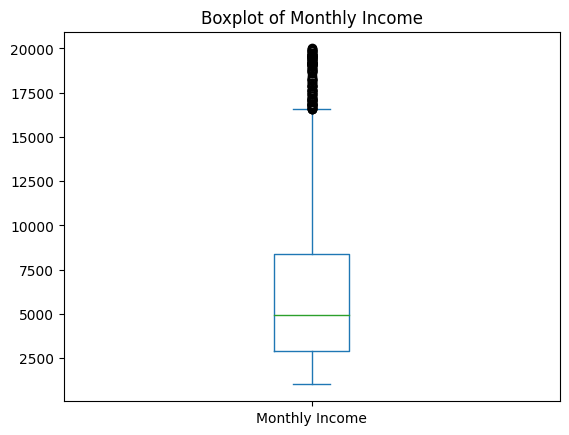

In [ ]:
# Boxplot of the Monthly Income
hr['Monthly Income'].plot(kind = 'box', title = 'Boxplot of Monthly Income')
plt.show()

In [ ]:
# Calculate the average monthly income for each gender.
average_income_by_gender = hr.groupby('Gender')['Monthly Income'].mean()

print(average_income_by_gender)

Gender
Female    6686.566327
Male      6380.507937
Name: Monthly Income, dtype: float64


# T-test for monthly income based on Gender

*Ho:* There is no significant difference in the monthly income based on the female and male gender.

*HA:* There is a signficant difference in the monthly income based on the female and male gender.


In [ ]:
 # Extracting monthly income data for each gender
from scipy.stats import ttest_ind
male_income = hr[hr['Gender'] == 'Male']['Monthly Income']
female_income = hr[hr['Gender'] == 'Female']['Monthly Income']

# Performing an independent t-test
t_stat, p_value = ttest_ind(male_income, female_income)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -1.2212617308870655, P-value: 0.22218303455087898


Since the p-value of 0.22218303455 is much higher than the standard cofidence level of 0.05, we fail to reject the null hypothesis that there is no significant difference between the male and female gender based on their monthly income. There is insufficient evidence in support of the alternative hypthoesis that the diffence is proportion is statistically significant.

Basic Data Analysis

In [ ]:
hr.describe

In [ ]:
# Dictionary of all the columns arranaged by indices
dict(zip(hr.columns, range(len(hr.columns))))

# Filtering on both the indices AND the columns

df.iloc[row_filter, (column filter)]



* Column filter is optional (not specifying a column will return ALL columns)
*   Input integers, slices or integer lists
*   Cannot input a boolean series







In [ ]:
# returns all columns for 1st row
hr.iloc[0, :]

# reuturn all columns for last row
hr.iloc[-1, :]

# filter on the row and returning a single column
hr.iloc[0,8]

In [ ]:
#return all the rows from a column (Attrition)
hr.iloc[:,0] # hr['Attrition]


In [ ]:
# return all the rows for Department, Education Field and Education
# NOTE: passing through multiple columns will return a Dataframe
# passing through a single column will return a series
hr.iloc[:,[4,5,20]]

In [ ]:
# return the first 5 rows for Department, Education Field and Education
# slicing - starts at index 0, ends at last index -1 (4)
hr.iloc[0:5,[4,5,20]]
# hr.iloc[:5,[4,5,20]]

In [ ]:
# return the 'Job satisfication'(26) and 'Worklife balance' (36) for every other employee
# the step = 2 (number of jumps)
hr.iloc[::2,[26,36]]




df.loc[row_filter, (cloumns_filter)]


*   Column filter is optional (not specifying a column filter will return ALL columns)
*   Can input a boolean series

*   Can input integers, slices, or interger to filter on the indices
*   CANNOT input integers, slices, or integer lists to filter on the columns





In [ ]:
# Reurn all of the employees that are female

Income Analysis

Education Analysis

In [ ]:
# Different levels of Education
Associates = hr['Education'].value_counts()["Associates Degree"]
print(f'The number of employees with a Associates degree is {Associates}')

Bachelors = hr['Education'].value_counts()["Bachelor's Degree"]
print(f'The number of employees with a Bachelors degree is {Bachelors}')

Masters = hr['Education'].value_counts()["Master's Degree"]
print(f'The number of employees with a Masters degree is {Masters}')

Doctoral = hr['Education'].value_counts()["Doctoral Degree"]
print(f'The number of employees with a Doctoral degree is {Doctoral}')


The number of employees with a Associates degree is 282
The number of employees with a Bachelors degree is 572
The number of employees with a Masters degree is 398
The number of employees with a Doctoral degree is 48


In [ ]:
# Field of Education
Medical = hr['Education Field'].value_counts()["Medical"]
print(f'The number of employees with a Medical background is {Medical}')

Life_Science = hr['Education Field'].value_counts()["Life Sciences"]
print(f'The number of employees with a Life Sciences background is {Life_Science}')

Technical = hr['Education Field'].value_counts()["Technical Degree"]
print(f'The number of employees with a Technical background is {Technical}')

Income Ranges

In [ ]:
# Monthly income

print(hr[hr['Monthly Income'] < 5000 ])